# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# Step 2: Load and Analyze the Dataset

In [2]:
df  = pd.read_csv("C:\ExcelR\DS\Assignment\KNN\KNN\Zoo.csv",encoding='utf-8')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Step 3: Preprocess the Data

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
df= df.drop(columns=['animal name'])

In [7]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<AxesSubplot:>

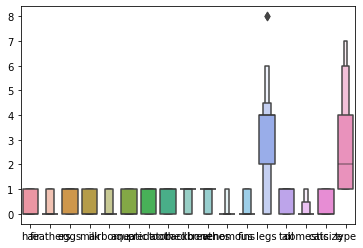

In [8]:
sns.boxenplot(data=df)

# Step 4: Split the Dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
x = df.iloc[:,:-1]
y = df['type']

In [11]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=42)

In [14]:
xtest

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1


In [15]:
xtrain

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [16]:
ytrain

89    5
26    5
42    6
70    1
15    7
     ..
60    4
71    2
14    7
92    4
51    6
Name: type, Length: 80, dtype: int64

In [17]:
ytest

84    1
55    1
66    1
67    1
45    1
39    6
22    1
44    1
10    1
0     1
18    4
30    6
97    6
33    2
77    7
4     1
93    1
78    2
12    4
31    1
76    3
Name: type, dtype: int64

# Step 5: Implement KNN Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=3 ,metric= 'euclidean')

In [20]:
model=knn.fit(xtrain , ytrain)

In [21]:
ypred = model.predict(xtest)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'n_neighbors': range(1, 11), 'metric': ['manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

print("Best parameters:", grid_search.best_params_)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'metric': 'manhattan', 'n_neighbors': 1}


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
ypred= knn.predict(xtest)

In [26]:
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

# Step 6: Evaluate Classifier Performance

In [27]:
# Calculate evaluation metrics
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

# Print the classification report
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(ytest, ypred))


Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1-Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:14

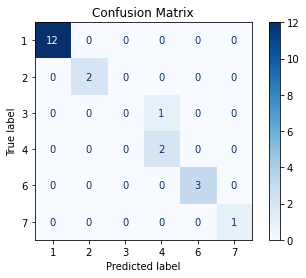

In [28]:
ConfusionMatrixDisplay.from_estimator(knn, xtest, ytest, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Visualize Decision Boundaries

In [29]:
# Select two features for visualization
X_train_2D = xtrain.iloc[:,:2]  # Take only first two features
X_test_2D = xtest.iloc[:,:2]


In [30]:
# Train the model on the reduced dataset
knn_2D = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2D.fit(X_train_2D, ytrain)


KNeighborsClassifier(metric='euclidean')

In [31]:
# Visualize decision boundaries
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


In [32]:
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


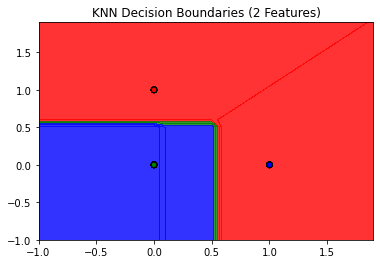

In [33]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train_2D.iloc[:, 0], X_train_2D.iloc[:, 1], c=ytrain, s=30, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('KNN Decision Boundaries (2 Features)')
plt.show()

1] What are the key hyperparameters in KNN?
K (number of neighbors): The number of nearest neighbors to consider while making a prediction.
Distance metric: Determines how the distance between points is calculated (e.g., Euclidean, Manhattan, Minkowski).
Weighting function: Neighbors can be uniformly weighted or weighted based on distance.


2] What distance metrics can be used in KNN?
Euclidean distance: The straight-line distance between two points.
Manhattan distance: The sum of absolute differences between the coordinates.
Minkowski distance: A generalized form of both Euclidean and Manhattan, where a parameter 'p' defines the distance.
Hamming distance: Used for categorical data, it measures the number of positions at which the corresponding elements are different.